In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import os
import datetime
import imageio.v2 as imageio

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'hot'

In [4]:
#sji = fits.open("/home/solararies/Project/Data/data_1/iris_l2_20220306_215937_3600105475_SJI_1400_t000.fits")
sji = fits.open("/home/solararies/Project/Data/data_1/iris_l2_20220306_215937_3600105475_SJI_1400_t000.fits",memmap=True, do_not_scale_image_data=True)
sji.info()
hd = sji[0].header

Filename: /home/solararies/Project/Data/data_1/iris_l2_20220306_215937_3600105475_SJI_1400_t000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     162   (776, 548, 64)   int16   
  1                1 ImageHDU        38   (31, 64)   float64   
  2                1 TableHDU        33   64R x 5C   [A10, A10, A3, A66, A60]   


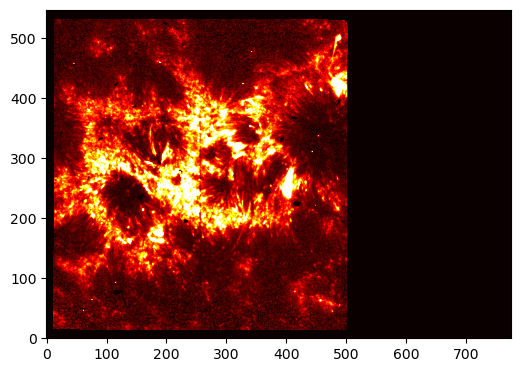

In [6]:
#plt.imshow(sji[0].data[50], vmin=0, vmax=30)
plt.figure(figsize=(6, 6)) 
plt.imshow(sji[0].data[0] * hd['BSCALE'] + hd['BZERO'],vmin=0, vmax=30)
#plt.title('Region of interest in IRIS 1400$\AA$')
           

We can see that the first two axes have type of ‘HPLN’ and ‘HPLT’, meaning helioprojective-cartesian longitude and latitude respectively, or solar X and Y. The last axis is time in seconds.

In [7]:
hd = sji[0].header
wcs = WCS(hd)
t_ind=sji[0].data.shape[0]

  'seconds' -> 's'. [astropy.wcs.wcs]


You’ll notice that the solar coordinate grid is slightly tilted from the image axes. This is normal. With different IRIS roll angles, this difference will be even more obvious.

In [10]:
start_obv = sji[0].header['STARTOBS']
end_obv = sji[0].header['ENDOBS']

def generate_time_array(start_time, end_time):
    start = datetime.datetime.fromisoformat(start_time)
    end = datetime.datetime.fromisoformat(end_time)
    
    time_array = []
    current_time = start
    while current_time <= end:
        time_array.append(current_time.strftime("%H:%M:%S"))
        current_time += datetime.timedelta(seconds=10.80)
    
    return time_array

start_time = start_obv[:19]
end_time = end_obv[:19]   
time_sji = generate_time_array(start_time, end_time)
#len(time_sji)

In [6]:
folder_name = '/home/solararies/Project/Codes/plots/'
os.makedirs(folder_name, exist_ok=True)

t_ind = sji[0].data.shape[0]

for i in range(t_ind):
    ax = plt.subplot(projection=wcs.dropaxis(-1))
    plt.title(f'Region of interest in 1400Å(IRIS) \nTime: {time_sji[i]}')
    ax.imshow(sji[0].data[i] * hd['BSCALE'] + hd['BZERO'], vmin=0, vmax=30)
    plt.xlabel("Solar X (arcsec)")
    plt.ylabel("Solar Y (arcsec)")
    
    x1, y1 = 360, 170
    x2, y2 = 700, 660
    
    x_array = [x1, x2, x2, x1, x1]
    y_array = [y1, y1, y2, y2, y1]
    
    plt.plot(x_array, y_array, color='white', linewidth=0.7)
    file_index = str(i + 0).zfill(3)
    
    plt.savefig(os.path.join(folder_name, f'plot_{file_index}.jpg'))
    plt.close()


SyntaxError: invalid decimal literal (3705829127.py, line 21)

In [16]:

folder_name = '/home/solararies/Project/Codes/plots/'
images = []
image_files = sorted([f for f in os.listdir(folder_name) if f.endswith('.jpg')])

for image_file in image_files:
    images.append(imageio.imread(os.path.join(folder_name, image_file)))

output_video = os.path.join(folder_name, 'cutout_video.mp4')
imageio.mimwrite(output_video, images, fps=30)

print('Good work Helioguy !!!')


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x622a200] Warning: data is not aligned! This can lead to a speed loss


Good work Helioguy !!!
